In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.options.mode.chained_assignment = None

In [12]:
data = [
    [5, 0.025, 2],
    [5, 0.050, 3],
    [5, 0.1, 3],
    [10, 0.025, 5],
    [10, 0.050, 6],
    [10, 0.1, 6],
    [15, 0.025, 10],
    [15, 0.050, 12],
    [15, 0.1, 17],
]
df = pd.DataFrame(columns=['minutes', 'buckets', 'count'], data=data)
df.pivot(index="minutes", columns="buckets", values="count")

buckets,0.025,0.050,0.100
minutes,,,
5,2,3,3
10,5,6,6
15,10,12,17


Thực hiện biểu diễn những giá trị lên biểu đồ:

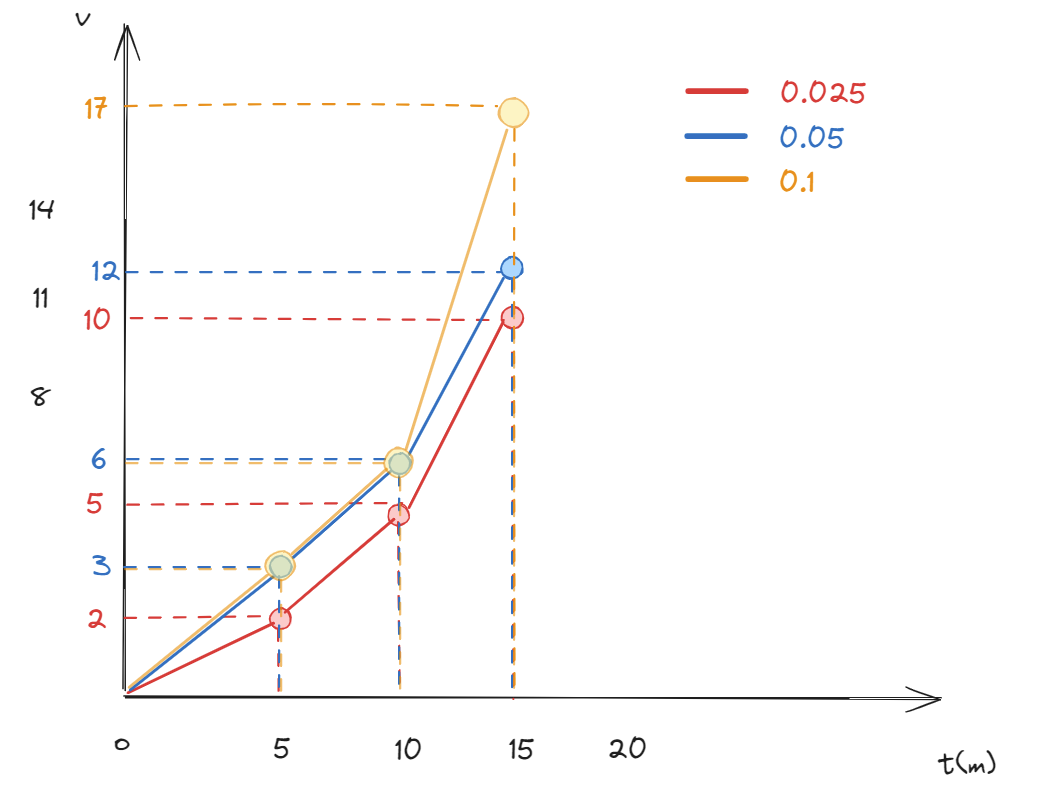

Các giá trị về số lượng phần tử được fill vào các buckets được biểu diễn theo trục Oy và sẽ tăng trưởng theo thời gian t (trục Ox)

### Phân tích biểu đồ

#### Phân tích tăng trưởng buckets tại một thời điểm bất kì

Xét trên thời điểm t = 5 (minutes):

    - Bucket le=0.025 bao gồm 2 requests đã được fill vào
    - Bucket le=0.05 có 3 requests đã được fill vào
    - Bucket le=0.1 có 3 requests đã được fill vào
Vì vậy, Trong khoảng thời gian t = 5 số request tăng trưởng theo mỗi bucket được tăng như sau:

- Bucket range [0.025 -> 0.05] tăng: 
$\Delta$ v = 3 - 2 = 1 (có 1 request nằm trong khoảng này)
- Bucket range [0.05 -> 0.1] tăng: 
$\Delta$ v = 3 - 3 = 0 (không có request nào nằm trong khoảng này)

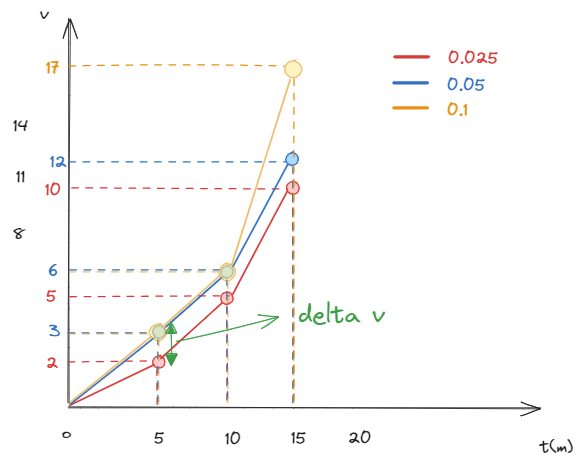
    
**Vì vậy có thể nhận thấy tại thời điểm này biến động tăng trưởng hầu hết nằm trong khoảng bucket từ [0.025 -> 0.05]**

Tương tự cách tính tìm được tại thời điểm t = 15m tăng trưởng hầu hết nằm trong khoảng bucket từ [0.05 -> 0.1]

#### Phân tích tăng trưởng buckets theo dòng thời gian để tính toán percentile latency

Đây là thuật toán mà Prometheus sử dụng để tính toán tỉ lệ tăng trưởng tại các buckets theo dòng thời gian. Vì histogram được sử dụng trong Prometheus phân chia bucket range start từ 0 nên counter của các bucket lớn hơn sẽ bao gồm cả counter của bucket nhỏ hơn. (Buckets: 0->0.025, 0->0.05, -> 0->0.1)

*Ví dụ: Bucket **le=+Inf** sẽ bao gồm phần tử của **le=0.5 và le=0.25** hoặc bucket **le=0.5** bao gồm các phần tử của bucket **le=0.25***

**Vậy nên, khi biểu diễn các buckets trên biểu đồ thì các giá trị của bucket nhỏ hơn sẽ không bao giờ vượt quá ngưỡng giá trị của các bucket lớn hơn tại một thời điểm**